<a href="https://colab.research.google.com/github/vineeth33/ShoreSecure/blob/main/predicting_surfing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:


# Load the dataset into a DataFrame
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
df.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Chennai,2021-12-12,31.0,24.8,27.2,37.7,24.8,29.9,24.8,87.6,...,13.2,6,NaN,2021-12-12T06:21:36,2021-12-12T17:43:35,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VOMM,43279099999,AUCE,43278099999"
1,Chennai,2021-12-13,31.0,25.3,27.7,37.7,25.3,30.7,24.7,84.3,...,13.8,6,NaN,2021-12-13T06:22:09,2021-12-13T17:43:59,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"VOMM,43279099999,AUCE,43278099999"
2,Chennai,2021-12-14,30.0,25.0,27.5,35.4,25.0,29.6,23.3,78.9,...,14.1,6,NaN,2021-12-14T06:22:42,2021-12-14T17:44:23,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOMM,43279099999,AUCE,43278099999"
3,Chennai,2021-12-15,30.0,25.0,27.4,33.3,25.0,28.8,21.8,72.3,...,15.3,7,NaN,2021-12-15T06:23:14,2021-12-15T17:44:49,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOMM,43279099999,AUCE,43278099999"
4,Chennai,2021-12-16,30.0,23.6,26.3,32.3,23.6,27.2,21.3,75.4,...,18.7,8,NaN,2021-12-16T06:23:46,2021-12-16T17:45:15,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"VOMM,43279099999,AUCE,43278099999"


name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          425
snow                  0
snowdepth             6
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk           29
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
stations              0
dtype: int64
          tempmax     tempmin        temp  feelslikemax  feelslikemin  \
count  997.000000  997.000000  997.000000    997.000000    997.000000   
mean    33.431394   26.047041   29.332397     41.

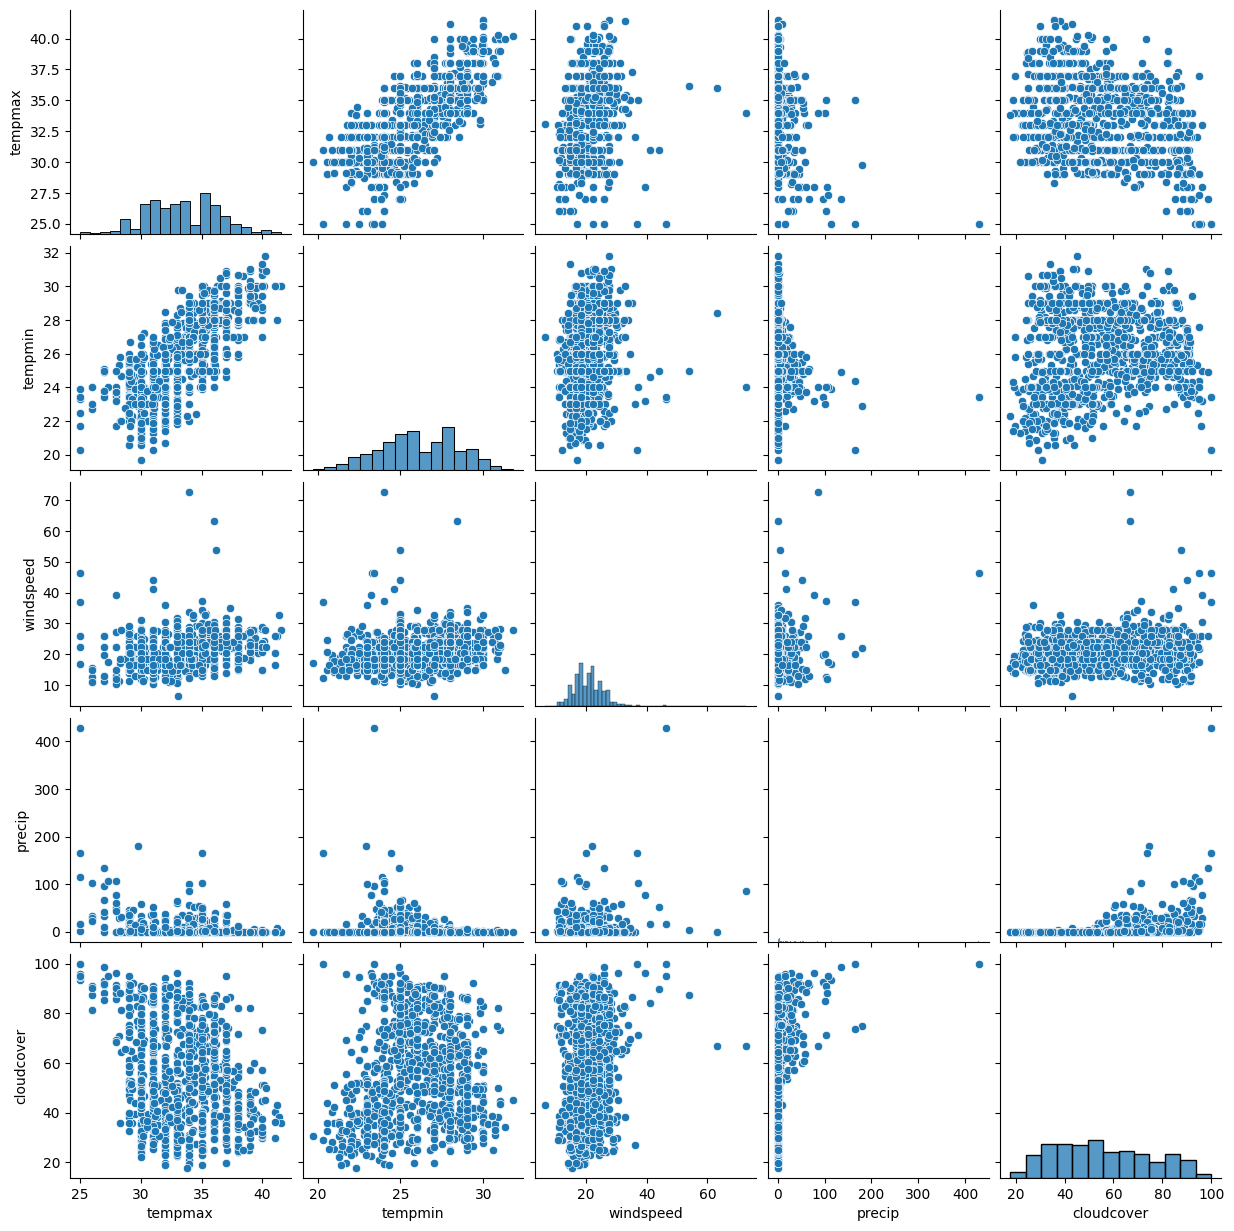

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check data types
print(df.dtypes)

# Visualize the distribution of important features
sns.pairplot(df[['tempmax', 'tempmin', 'windspeed', 'precip', 'cloudcover']])
plt.show()


In [ ]:
def is_surfable(row):
    # Example logic: surfing is possible if windspeed < 30, cloudcover < 50%, and no rain
    if row['windspeed'] < 30 and row['cloudcover'] < 50 and row['precip'] == 0:
        return 1
    else:
        return 0

# Apply the function to create the target variable
df['Surfable'] = df.apply(is_surfable, axis=1)


In [ ]:
X = df.drop(columns=['Surfable', 'datetime', 'conditions', 'description', 'icon', 'stations'])
y = df['Surfable']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# List of numerical features
num_features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
                'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed',
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
                'solarenergy', 'uvindex', 'severerisk', 'moonphase']

# List of categorical features (none in this case, but included for completeness)
cat_features = []

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)])

# Build the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])


In [ ]:
from sklearn.impute import SimpleImputer

# Imputer for filling missing values (mean for numerical, most frequent for categorical)
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Update the column transformer with the imputer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', StandardScaler())]), num_features),
        ('cat', Pipeline(steps=[('imputer', cat_imputer), ('encoder', OneHotEncoder())]), cat_features)])

# Update the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Fit the model again
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



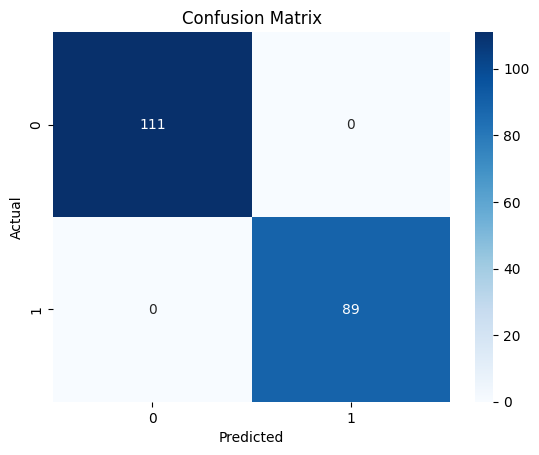

In [ ]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the pipeline (which includes both preprocessing and the classifier)
joblib.dump(pipeline, 'surfing_model.pkl')


['surfing_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('surfing_model.pkl')

# Use the loaded model to predict on new data
new_data = X_test.iloc[0:1]  # Example with one instance from test data
surfing_possible = loaded_model.predict(new_data)
print('Surfing possible:' if surfing_possible else 'Surfing not possible')


Surfing possible:


In [ ]:
# Example of new data (ensure the features are in the same order as the training data)
new_data = pd.DataFrame({
    'tempmax': [30],
    'tempmin': [25],
    'temp': [27.4],
    'feelslikemax': [33.3],
    'feelslikemin': [25],
    'feelslike': [28.8],
    'dew': [21.8],
    'humidity': [72.3],
    'precip': [0],
    'precipprob': [0],
    'precipcover': [0],
    'windspeed': [20],
    'winddir': [22.9],
    'sealevelpressure': [1011.8],
    'cloudcover': [48.6],
    'visibility': [5.6],
    'solarradiation': [176.4],
    'solarenergy': [15.3],
    'uvindex': [7],
    'severerisk': [0],
    'moonphase': [0.37]
})

# Predict surfing possibility
surfing_possible = loaded_model.predict(new_data)
print('Surfing possible:' if surfing_possible else 'Surfing not possible')


Surfing possible:


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Accuracy: 0.9924842767295597


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def predict_surfing_with_visuals(date_input, df, model):
    """
    Predicts if surfing is possible on a given date and provides visual insights.

    Parameters:
    date_input (str): Date in the format 'YYYY-MM-DD'.
    df (DataFrame): DataFrame containing historical weather data.
    model: Trained model pipeline for predicting surfing conditions.

    Returns:
    dict: A dictionary with the prediction and other relevant weather data.
    """
    # Filter the data for the given date
    date_data = df[df['datetime'] == date_input]

    if date_data.empty:
        return {"Error": "No data available for the provided date."}

    # Prepare the features for prediction (excluding columns like 'Surfable', 'datetime', etc.)
    features = date_data.drop(columns=['Surfable', 'datetime', 'conditions', 'description', 'icon', 'stations'])

    # Make prediction
    prediction = model.predict(features)[0]

    # Get relevant weather information
    weather_info = {
        'Date': date_input,
        'Temperature (Max)': date_data['tempmax'].values[0],
        'Temperature (Min)': date_data['tempmin'].values[0],
        'Wind Speed': date_data['windspeed'].values[0],
        'Precipitation': date_data['precip'].values[0],
        'Cloud Cover': date_data['cloudcover'].values[0],
        'Surfing Possible': 'Yes' if prediction == 1 else 'No'
    }

    # Plot temperature trends
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['tempmax'], label='Max Temperature', color='r')
    plt.plot(df['datetime'], df['tempmin'], label='Min Temperature', color='b')
    plt.axvline(x=date_input, color='g', linestyle='--', label='Selected Date')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Trends')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    # Plot wind speed and cloud cover
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Wind Speed (km/h)', color=color)
    ax1.plot(df['datetime'], df['windspeed'], color=color, label='Wind Speed')
    ax1.axvline(x=date_input, color='g', linestyle='--', label='Selected Date')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:gray'
    ax2.set_ylabel('Cloud Cover (%)', color=color)
    ax2.plot(df['datetime'], df['cloudcover'], color=color, label='Cloud Cover')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Wind Speed and Cloud Cover Trends')
    plt.xticks(rotation=45)
    plt.show()

    return weather_info


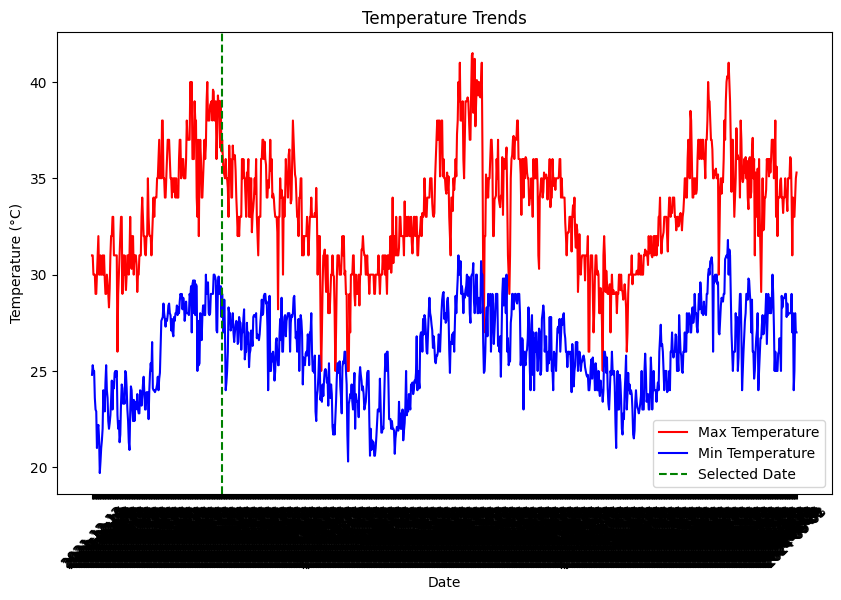

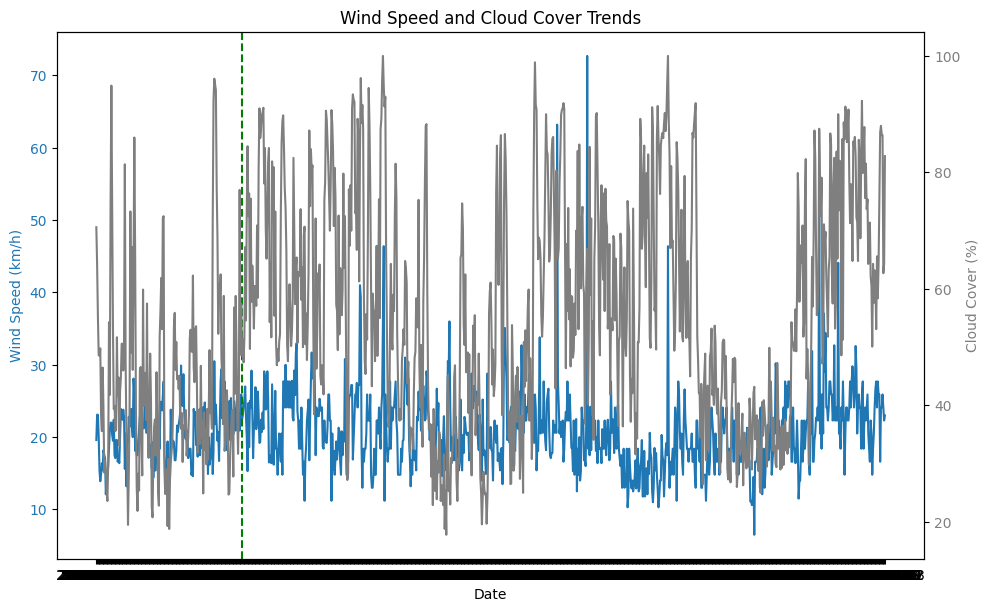

Date: 2022-06-14
Temperature (Max): 37.0
Temperature (Min): 29.0
Wind Speed: 22.4
Precipitation: 0.0
Cloud Cover: 48.6
Surfing Possible: Yes


In [ ]:
# Example usage
date_input = '2022-06-14'  # Input date
result = predict_surfing_with_visuals(date_input, df, loaded_model)

# Display the result
if 'Error' in result:
    print(result['Error'])
else:
    for key, value in result.items():
        print(f"{key}: {value}")
